# Demo: Reading Data From City of Rochester
data/BikeRochester was an export of data from City of Rochester that should match data found in their [bike map here](https://maps.cityofrochester.gov/portal/apps/webappviewer/index.html?id=c43beb5e7cbb456eae74822dfcf98db4).

In [25]:
import geopandas as gpd
import fiona

In [26]:
# Trails appears to be off-street bike network
trails = gpd.read_file('data/BikeRochester/Trails.shp')

<AxesSubplot:>

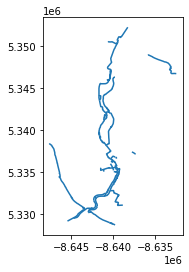

In [27]:
trails.plot()

In [28]:
# Bike lanes appear to be on-street bike network
bike_lanes = gpd.read_file('data/BikeRochester/Bike Markings.shp')

In [29]:
bike_lanes.groupby('Type')['Length_Mi'].sum()

Type
Bike Blvd       8.32
Bike Lanes     53.49
Cycle Track     1.71
Shared Use     27.84
Name: Length_Mi, dtype: float64

<AxesSubplot:>

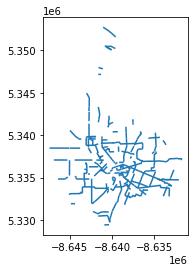

In [30]:
bike_lanes.plot()